# PLDT Anuna?: Topic Modeling of Customer Concerns to Streamline Service Support


<img src='images/img_banner.png' height='400'>

## I. Executive Summary

**Background:**

According to Nielsen’s law of internet bandwidth, “a high-end user’s connection speed grows by 50% by year.” [1], but with the current state of internet connectivity in the Philippines, are we progressing backwards? In this digital age, internet definitely revolutionized people’s conduct of daily activities. The need for connectivity was further magnified during the pandemic as it restricted physical communications and changed the nature of people’s social interactions. But, why is having an uninterrupted Internet connection important?

Internet disconnection will result to disruption in business processes and operations, with the effect trickling down to individual internet users. It is estimated that for a highly Internet connected country, the per day impact of a temporary shutdown of the Internet and all of its services would be on average $23.6 million per 10 million population [2]. Apart from the economic consequences of Internet disruptions, it will also result to reduced productivity, unclear messaging and communication, and the focus of this project, which is the increase in customer complaints [3]. 

For this project, we focused on the tweets retrieved using Twitter’s application programming interface (“API”) for developers [4], specifically on PLDT Inc.’s (formerly Philippine Long Distance Telephone Company, which we refer to as “PLDT” or the “Company”) official twitter accounts, @PLDTHome and @PLDT_Cares. PLDT is the leading and largest fully integrated telecommunications and digital services provider in the Philippines, with its retail fixed line services branded under the PLDT Home (“PLDT Home”) brand. PLDT Home is the Philippines’ fastest fixed network and digital services provider, serving nearly three million home broadband subscribers nationwide as of year-end 2021 [5] and the 5th fastest in Southeast Asia in 2021 [6]. While PLDT is the top Internet service provider, Internet-related concerns is the most reported problem by its customers. 

Apart from the standard English stop words, we removed irrelevant and neutral words such as usernames, links, retweets, punctuations, and extra characters, and Filipino stop words and curse words before conducing any exploratory data analysis from the tweets we extracted. The cleaned tweets were then normalized into lowercase format, vectorized using Term Frequency-Inverse Document Frequency (TF-IDF) and lemmatized resulting to a total of 493 dimensions. Afterwards, we performed Truncated Singular Value Decomposition (“SVD”) and Non-Negative Matrix Factorization (“NMF”) to reduce further these dimensions and uncover hidden topics. 

Compared to the results of Latent Semantics Analysis (“LSA”), NMF was able to uncover more relevant topics to distinguish customer concerns: (a) No First action response, (b) Long Waiting Time, (c) Automated Response, (d) Disconnection, (e) Line Relocation Inquiry, (f) Billing Concerns and (g) Feedback. 


Although unique customer concerns were identified in this project, sentiment and contextual analysis of the tweets was not investigated. This kind of analysis would provide more context on the nature of the concerns. Other clustering can be performed to determine if more patterns would appear as more data is is collected in longer periods. 



**Objectives:**

We aim to identify the underlying characteristics and types of user complaints which would allow internet providers to appropriately assign user concerns to the right handling department. This initiative will speed up the resolution time and effectively improve customer experience. Given this objective in mind, we explore the tweets from the past seven days from November 29, 2022, focusing specifically on the following questions: 

1.	What are the topics/ types of complaints we uncovered and how will this be interpreted? 
2.	How can these topics be used by our stakeholders, which in this case the internet providers, in improving customer experience, in terms of effectively and efficiently addressing customer concerns? 


## II. List of Tables and Figures

**Table 1.** Tweet – Data Dictionary
<br>
**Table 2.** Derived Features – Data Dictionary
<br>

-------------------------------------------------------
**Figure 1.** Project Methodology
<br>
**Figure 2.** Data Processing Steps
<br>
**Figure 3.** Tweets per Hour
<br>
**Figure 4.** Tweets per Day of Week
<br>
**Figure 5.** Histogram of the Public Tweet Metrics
<br>
**Figure 6.** English/ Filipino Stop Words in Tweets
<br>
**Figure 7.** Is the Track a Collaboration?
<br>
**Figure 8.** Cleaned words from Tweets
<br>
**Figure 9.** 272 Singular Vectors, 90% Explained Variance
<br>
**Figure 10.** Topic 1 (LSA)
<br>
**Figure 11.** Topic 2 (LSA)
<br>
**Figure 12.** Topic 3 (LSA)
<br>
**Figure 13.** Topic 4 (LSA)
<br>
**Figure 14.** Topic 5 (LSA)
<br>
**Figure 15.** Topic 6 (LSA)
<br>
**Figure 16.** Topic 7 (LSA)
<br>
**Figure 17.** Topic 8 (LSA)
<br>
**Figure 18.** Topic 9 (LSA)
<br>
**Figure 19.** Topic 10 (LSA)
<br>
**Figure 20.** Summary of Results: LSA
<br>
**Figure 21.** 49 Latent Factors
<br>
**Figure 22.** Topics (NMF)
<br>
**Figure 23.** Summary of Results: NMF 
<br>
**Figure 24.** Mapping of Results to Actual Categories used in PLDT to Segregate Customer Concerns

## III. Method

<center>Figure 1: Project Methodology </center>
<img src='images/img_method.png' height='400'>

### About the Data


This work focuses on uncovering customer concerns based on people's tweets to PLDT's Customer Service Accounts, and only tweets within the last 7 days from 29 November 2022 were considered. The whole extraction, transformation, and loading of data is written in the `tweets_etl.py` file, which is used in this notebook as a module for the data preparation process.

<center>Figure 2: Data Processing Steps </center>
<img src='images/img_data_processing.png' width='800' height='400'>

The tweets collected have 14 features and a brief definition of each are listed as follows:

<br>
<center style="font-size:12px;font-style:default;"><b>Table 1. Tweet - Data Dictionary</b></center>

|Feature    | Data Type     | Description                                                                           |
|:--------------|:-------------|:--------------------------------------------------------------------------------------|
|lang|string|The language of a Tweet, if detected by Twitter
|possibly_sensitive|boolean|This field indicates a content may be recognized as sensitive
|id|string|The unique identifier of the requested Tweet
|conversation_id|string|The Tweet ID of the original Tweet of the conversation 
|text|string|The actual UTF-8 text of the Tweet
|created_at|datetime|Creation time of the Tweet
|author_id|string|The unique identifier of the user who posted the Tweet
|in_reply_to_user_id|string|If the represented Tweet is a reply, this field will contain the original Tweet’s author ID
|public_metrics.retweet_count|integer|The number of times a public Tweet was retweeted at the time of request 
|public_metrics.reply_count|integer|The count of replies to a public Tweet at the time of request
|public_metrics.like_count|integer|The count of likes of a public Tweet at the time of request
|public_metrics.quote_count|integer|The number of times a public Tweet was quoted at the time of request

<br>
<center style="font-size:12px;font-style:default;"><b>Table 2. Derived Features - Data Dictionary</b></center>


|Feature    | Data Type     | Description                                                                           |
|:--------------|:-------------|:--------------------------------------------------------------------------------------|
|created_at_hour|integer|The hour a Tweet was created
|day_of_week|object|The day a Tweet was created


In [1]:
from tweets_etl import PLDT_tweets

from tqdm.notebook import trange
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sqlite3

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import word_tokenize
# import nltk
import re

from wordcloud import WordCloud
from collections import Counter

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF

# set global plotting parameters
custom_sns_params = {'lines.linewidth': 2, 'font.size': 12,
                     'axes.titlesize': 20, 'axes.labelsize': 12,
                     'xtick.labelsize': 12, 'ytick.labelsize': 12,
                     'legend.fontsize': 12, 'legend.fancybox': True,
                     'axes.spines.right': False, 'axes.spines.top': False}
                    # 'figure.figsize':(12, 6)
sns.set_theme('notebook', style='ticks', rc=custom_sns_params)
colors = ['#C00000', '#44546A', '#FF0000', '#767171', '#FF5154', '#D0CECE']
custom_palette = sns.blend_palette(colors) # , n_colors=5
sns.set_palette(custom_palette)
# custom_palette

randstate = 143

# define a global parameter figure counter
fig_n = 3
def fig_count():
    global fig_n
    fig_n += 1
    return fig_n

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-3az2ncxs because the default path (/home/mmenorca/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


#### Web API Scraping

1,541 tweets accompanied by 14 selected features such as the text of a user’s tweet to @PLDT_Cares and the time the tweet was tweeted.

The `https://api.twitter.com/2/tweets/search/recent` endpoint was used to get the tweets where we passed `(@PLDT_Cares OR @PLDTEnt_Cares) -from:PLDT_Cares` as the values of our query parameter to contain the scope of our search to tweets made by individuals that are addressed to the PLDT_Cares Twitter account.


   * `(@PLDT_Cares OR @PLDTEnt_Cares)` captures tweets that may only mention the latter but are in fact addressed to the former. Upon visual inspection of several recent tweets to PLDT_Cares, some included @PLDTEnt_Cares, another customer service account managed by PLDT for their other products.
    
    
* `-from:PLDT_Cares` and `-from:PLDTEnt_Cares`, on the other hand, excluded tweets made by PLDT in response to tweets that mentioned @PLDT_Cares and @PLDTEnt_Cares.
    
    
* `-is_retweet` and `-is_quote`, excluded retweets and quotations of tweets to PLDT.

In [ ]:
# CALLS IN THIS CELL WOULD SCRAPE TWEETS USING TWITTER API

# # PLDT_tweets class requires a sqlite database path
# # and will ask for your Twitter API bearer_key
# scraper = PLDT_tweets('./pldt_tweets.db')

# # assign the class's conn attribute for later use
# conn = scraper.conn

# # use search_tweets method that accepts: 1) a query to scrape tweets and
# # 2) the name of the sql table to store the scraped tweets
# q = "(@PLDT_Cares OR @PLDTEnt_Cares) " \
#     "-from:PLDT_Cares -from:PLDTEnt_Cares " \
#     "-is:retweet -is:quote", # -is:reply
# scraper.search_tweets(f"{q}", 'tweets')

In [2]:
db = './pldt_tweets.db'
conn = f'sqlite:///{db}'
tbl_tweets = 'tweets'
df_tweets = pd.read_sql(f"SELECT * FROM {tbl_tweets}", conn,
                        parse_dates='created_at')

# add date and time indicators
df_tweets['created_at_hour'] = df_tweets.created_at.dt.hour
dow_order = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 
             4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df_tweets['day_of_week'] = pd.Categorical(df_tweets.created_at.dt.day_name(), dow_order.values())

In [3]:
df_tweets.head()

,lang,possibly_sensitive,id,conversation_id,text,created_at,author_id,in_reply_to_user_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,created_at_hour,day_of_week
0,tl,0,1597669876247957504,1597613288996896768,@longlivegian @PLDT_Cares lipat na sa globe ha...,2022-11-29 19:12:36+00:00,3301952628,1072316617508311040,0,0,0,0,19,Tuesday
1,tl,0,1597669137022525441,1597669137022525441,"Dear @PLDT_Cares @pldt @PLDTHome, \n\nIlang tw...",2022-11-29 19:09:40+00:00,708467737,None,0,0,0,0,19,Tuesday
2,en,0,1597667421527375872,1597667421527375872,Hi @PLDT_Cares no intetnet connection at the m...,2022-11-29 19:02:51+00:00,71999459,None,0,1,0,0,19,Tuesday
3,tl,0,1597667256791494656,1597667256791494656,@PLDT_Cares what happen po sa connection namin...,2022-11-29 19:02:11+00:00,978302677078519809,1526439727,0,0,0,0,19,Tuesday
4,zh,0,1597661954960941057,1594937451872600064,@PLDT_Cares 现在不是卡到不能用网了 加油 希望你能变得越来越好 如果又卡的话你也知道的,2022-11-29 18:41:07+00:00,1390935744168882177,1526439727,0,1,0,0,18,Tuesday


#### Database Creation

The scraped tweets using the Twitter API were written into a table in an SQL database for further processing and analysis. The description of the table is illustrated below.

In [4]:
conn = sqlite3.connect(db)
conn.execute(f'PRAGMA table_info({tbl_tweets})').fetchall()

[(0, 'lang', 'TEXT', 0, None, 0),
 (1, 'possibly_sensitive', 'INTEGER', 0, None, 0),
 (2, 'id', 'TEXT', 0, None, 0),
 (3, 'conversation_id', 'TEXT', 0, None, 0),
 (4, 'text', 'TEXT', 0, None, 0),
 (5, 'created_at', 'TEXT', 0, None, 0),
 (6, 'author_id', 'TEXT', 0, None, 0),
 (7, 'in_reply_to_user_id', 'TEXT', 0, None, 0),
 (8, 'public_metrics.retweet_count', 'INTEGER', 0, None, 0),
 (9, 'public_metrics.reply_count', 'INTEGER', 0, None, 0),
 (10, 'public_metrics.like_count', 'INTEGER', 0, None, 0),
 (11, 'public_metrics.quote_count', 'INTEGER', 0, None, 0)]

In [5]:
conn.close()

### Exploratory Data Analysis

#### Tweet Frequency

Twitter users publish tweets about their concerns towards PLDT most frequently from 1:00 to 2:00. It is also noticeable that the counts of tweets closely before and after this interval were also high, while a drop can be observed from 4:00 – 5:00. It is important to note that PLDT system maintenance usually occurs at these hours. After 4:00, an alternating pattern can be recognized from the histogram. Considering that majority of the concerns are due to disconnection or slow connectivity which might be connected to the maintenance, these issues might have caused the increase and decrease in the number of tweets every other hour. 

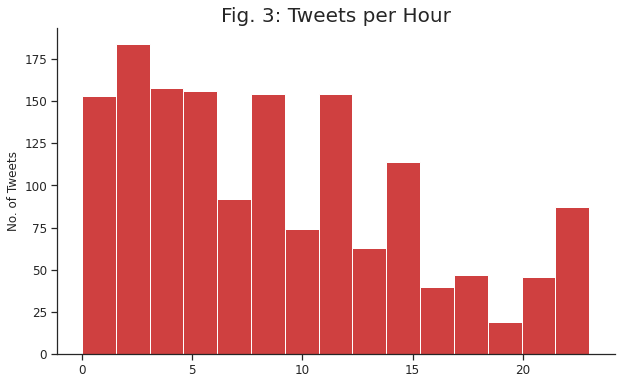

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tweets, x='created_at_hour')
plt.title(f'Fig. {fig_n}: Tweets per Hour')
plt.xlabel(None)
plt.ylabel('No. of Tweets')
# plt.savefig('hist_tweet_freq.png', dpi=150, bbox_inches='tight')
plt.show()

_ = fig_count()

Most of the tweets to PLDT were on Mondays, Tuesdays, and Wednesdays, which are at the start of the work or school week.
The relatively high tweet traffic could be attributed to the importance of Internet for work and school, and that disruption in the connection during these days has greater impact than in the latter parts of the week or the weekend.

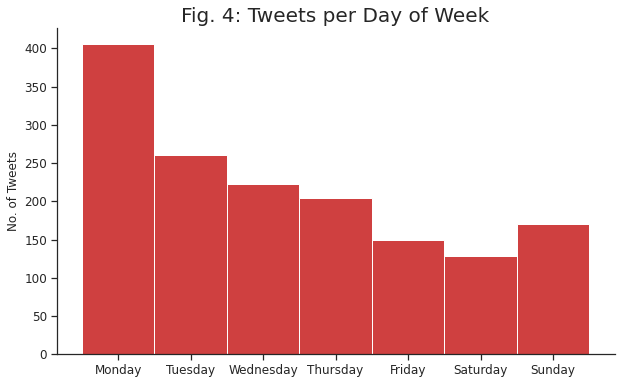

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_tweets, x='day_of_week')
plt.title(f'Fig. {fig_n}: Tweets per Day of Week')
plt.xlabel(None)
plt.ylabel('No. of Tweets')
# plt.savefig('hist_tweet_freq.png', dpi=150, bbox_inches='tight')
plt.show()

_ = fig_count()

#### Tweet Engagement

Figure 5 shows that most of the tweets represent individualistic sentiments, even though similarities in their concerns can be determined such as disconnection, bad service, and slow connectivity. This contrasts with viral tweets which are characterized by huge number of likes and retweets and can be described as collective sentiments. It seems that PLDT customers, while they have similar concerns to their fellow customers, are only concerned about their own internet issues. 

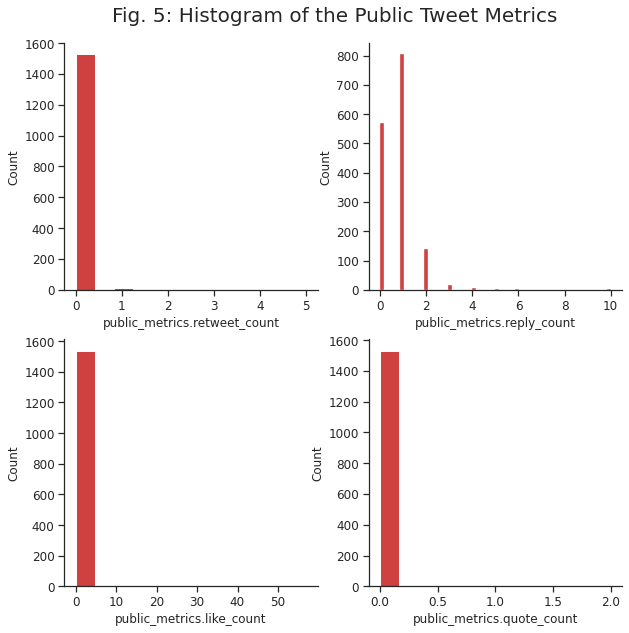

In [8]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
numeric_cols = ['public_metrics.retweet_count',
                'public_metrics.reply_count',
                'public_metrics.like_count',
                'public_metrics.quote_count',
                'created_at_hour']

sns.histplot(data=df_tweets, x=numeric_cols[0], ax=ax[0, 0])
sns.histplot(data=df_tweets, x=numeric_cols[1], ax=ax[0, 1])
sns.histplot(data=df_tweets, x=numeric_cols[2], ax=ax[1, 0])
sns.histplot(data=df_tweets, x=numeric_cols[3], ax=ax[1, 1])

fig.suptitle(f"Fig. {fig_n}: Histogram of the Public Tweet Metrics", fontsize=20, y=0.93)
# plt.savefig('hist_public_metrics.png', dpi=150, bbox_inches='tight')
plt.show()

_ = fig_count()

#### Text

Splitting the raw text into words, wherein a word in this case is defined as a set of letters separated by a space, we saw that there are a lot of irrelevant information such as the username of the accounts in the conversation, links, special characters (e.g., "!", ",", etc.), and stop words that do not add any value when uncovering topics as shown in Figures 6 and 7.

In [9]:
# define tagalog stop words and bad words [R]
tl_stopwords= ["pldt","pldtcares","pldthome","akin","aking","ako","alin",
               "am","amin","aming","ang","ano","anumang","apat","at","atin",
               "ating","ay","bababa","bago","bakit","bawat","bilang","dahil",
               "dalawa","dapat","din","dito","doon","gagawin","gayunman",
               "ginagawa","ginawa","ginawang","gumawa","gusto","habang",
               "hanggang","hindi","huwag","iba","ibaba","ibabaw","ibig",
               "ikaw","ilagay","ilalim","ilan","inyong","isa","isang",
               "itaas","ito","iyo","iyon","iyong","ka","kahit","kailangan",
               "kailanman","kami","kanila","kanilang","kanino","kanya",
               "kanyang","kapag","kapwa","karamihan","katiyakan","katulad",
               "kaya","kaysa","ko","kong","kulang","kumuha","kung","laban",
               "lahat","lamang","likod","lima","maaari","maaaring","maging",
               "mahusay","makita","marami","marapat","masyado","may",
               "mayroon","mga","minsan","mismo","mula","muli","na",
               "nabanggit","naging","nagkaroon","nais","nakita","namin",
               "napaka","narito","nasaan","ng","ngayon","ni","nila","nilang",
               "nito","niya","niyang","noon","o","pa","paano","pababa",
               "paggawa","pagitan","pagkakaroon","pagkatapos","palabas",
               "pamamagitan","panahon","pangalawa","para","paraan","pareho",
               "pataas","pero","pumunta","pumupunta","sa","saan","sabi",
               "sabihin","sarili","sila","sino","siya","tatlo","tayo",
               "tulad","tungkol","una","walang", "nyo", "niyo", "naman",
               "mo", "pls", "po", "kayo", "ba", "hi", "hello", "wala", "u",
               "nung", "nang", "kami", "kmi", "amp", "beh", "rin", "din",
               "jusko", "ha", "g", "kasi", "lang", "pi", "nadin", "narin",
               "e", "eh", "nga", "hey", "huy", "kayong", "nag", "paki", "pls"]

tl_badwords = ["amputa","animal ka","bilat","binibrocha","bobo","bogo",
               "boto","brocha","burat","bwesit","bwisit","demonyo ka",
               "engot","etits","gaga","gagi","gago","habal","hayop ka",
               "hayup","hinampak","hinayupak","hindot","hindutan","hudas",
               "iniyot","inutel","inutil","iyot","kagaguhan","kagang",
               "kantot","kantotan","kantut","kantutan","kaululan","kayat",
               "kiki","kikinginamo","kingina","kupal","leche","leching",
               "lechugas","lintik","nakakaburat","nimal","ogag","olok",
               "pakingshet","pakshet","pakyu","pesteng yawa","poke","poki",
               "pokpok","poyet","pu'keng","pucha","puchanggala","puchangina",
               "puke","puki","pukinangina","puking","punyeta","puta","putang",
               "putang ina","putangina","putanginamo","putaragis","putragis",
               "puyet","ratbu","shunga","sira ulo","siraulo","suso","susu",
               "tae","taena","tamod","tanga","tangina","taragis","tarantado",
               "tete","teti","timang","tinil","tite","titi","tungaw","ulol",
               "ulul","ungas", "yawa"]

stop_words = stopwords.words('english') + tl_stopwords + tl_badwords
punctuations = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

def plot_wordcloud(data_dict, title):
    """
    Plot a word cloud of a set of input words

    Parameters
    ----------
    data_dict : dict
        Dictionary whose keys are the words, and their frequency as values
        
    title: str
        Title of the figure to plot
    """
    c = Counter(data_dict)
    res = {key: val for key, val in sorted(c.items(), key = lambda ele: ele[1], reverse=True)}
    wordcloud = (WordCloud(background_color ='white', colormap='gist_heat',
                           width=1500, height=800, random_state=randstate)
                           .generate_from_frequencies(res))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(f'Fig. {fig_n}: {title}', fontsize=26)
    # plt.savefig('wc_usernames.png', dpi=150, bbox_inches='tight')
    _ = fig_count()
    plt.show()

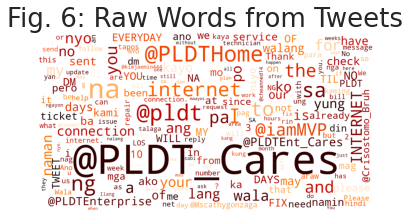

In [10]:
raw_tokens = np.concatenate(df_tweets.text.str.split().tolist())
plot_wordcloud(raw_tokens, 'Raw Words from Tweets')

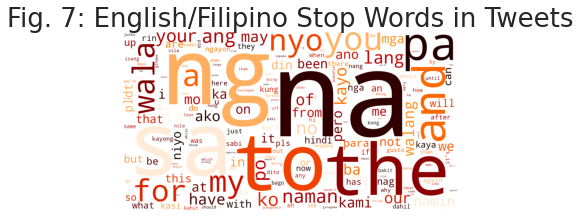

In [11]:
raw_sw_tokens = [t for t in raw_tokens if t in stop_words]
plot_wordcloud(raw_sw_tokens, 'English/Filipino Stop Words in Tweets')

### Natural Language Processing

**Text Cleaning**

Due to the noise in the texts, as mentioned in the previous section, some text cleaning steps had to be done [7]. First, the associated and tagged user accounts and retweet tags were removed, as these data are of no use to our research scope. Moreover, website links were removed as these are irrelevant to our objective of discerning customers' concerns with their PLDT subscriptions.

English stop words were removed using the Natural Language Toolkit (`nltk`) [8], whereas Filipino or Taglish stop words were removed using a mix of online references [9] and manual inspection. Further, profane and obscene texts were taken out as they do not enrich the text we wanted to get insights into.

After removing irrelevant twitter-related text data, numbers, punctuations, and double spaces were stripped as these are insignificant. All texts were then converted into lowercase to prevent them from occurring more than once with different letter cases, recorded as different words.

**Lemmatization**

In linguistics, the process of lemmatization relates to the mechanism of clustering together inflected forms of a word and converting them to their lemma or dictionary-form terms [10]. Instead of stemming, another text-processing technique that modifies words into their root words, lemmatization is more accurate as it algorithmically processes and determines the lemma based on the word’s intended meaning [11]. 

To accurately reduce our raw text data into their lemmas, the `WordNetLemmatizer` function imported from the `nltk.stem` library was applied.


**Bag-of-Words Representation**

The bag-of-words model is a simplifying representation that turns arbitrary text into vectors by counting how many times each word appears. This text-modeling technique disregards the order of the words, grammar, and context and converts them into fixed-length vectors [12, 13]. Each vector component corresponds to its unique tokens, and its values are equal to the occurrences of that token in the text. 

Before we could analyze the text data further, they were prepared by representing them into their individual bag-of-words vectors. The bag-of-words representation was then stored in a pandas DataFrame for further processing.


**Term Frequency-Inverse Document Frequency (TF-IDF)**

TF-IDF is a numerical statistic algorithm used to weigh a word in a document and assign importance based on the number of times that particular word appears in the given document [14, 15]. It is a text-processing procedure that highlights infrequent tokens, giving them more significance. In contrast, tokens that appear repeatedly are given bigger weights. 

Given that our text data has numerous tokens appearing frequently, we used the `TfidfVectorizer` function from the `sklearn.feature_extraction.text` library to penalize highly-occurring tokens. Applying the TF-IDF vectorizer resulted in 493 dimensions for further reduction.

In [12]:
def remove_links(tweet):
    # Reference: https://ourcodingclub.github.io/tutorials/topic-modelling-python/
    """
    Remove web links from a given text
    
    Parameters
    ----------
    tweet : string
        Text to be stripped of web links

    Returns
    -------
    tweet : string
        Text without webs links
    """
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
    return tweet

def remove_users(tweet):
    # Reference: https://ourcodingclub.github.io/tutorials/topic-modelling-python/
    """
    Remove user account information and retweet tags from a given text
    
    Parameters
    ----------
    tweet : string
        Text to be stripped of web links

    Returns
    -------
    tweet : string
        Text user information and retweet tags
    """
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

def clean_tweet(tweet):
    # Reference: https://ourcodingclub.github.io/tutorials/topic-modelling-python/
    """
    Transform a given text into lowercase format, remove any user account
    information, retweet tags, and special characters.
    
    Parameters
    ----------
    tweet : string
        Text to be cleaned and formatted

    Returns
    -------
    tweet : string
        Cleaned text
    """
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = re.sub(r'[^a-zA-Z]', ' ', tweet.lower()) # lowercase letters
    tweet = re.sub(fr'[{punctuations}]+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet_tokens = tweet.split(' ') #regex_tokenizer.tokenize(tweet) #
    tweet_tokens = [WordNetLemmatizer().lemmatize(w) for w in tweet_tokens
                        if w not in stop_words]

    tweet = ' '.join(tweet_tokens)
    return tweet


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#c00000', row_colors=['#f1f1f2', 'w'],
                     edge_color='w', bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    # Reference: https://stackoverflow.com/questions/19726663/
    # how-to-save-the-pandas-dataframe-series-data-as-a-figure
    """
    Render a pandas DataFrame as a figure
    
    Required Parameters
    ----------
    data : pandas Series
        Data to be rendered as figure
        
    Optional Parameters
    ----------
        
    col_width : float
        Width of the columns
        
    row_height : float
        Height of the rows
        
    font_size : float
        Size of the font
        
    header_color : string
        Color of the header
        
    row_colors : list
        Colors of the rows
        
    edge_color : string
        Color of the edges
        
    bbox : list
        Size of the bounding box
        
    header_columns : int
        Position of the header column
        
    ax : maplotlib Axes
        Axis to be plotted

    Returns
    -------
    figure : matplotlib Figure
    
    ax : matplotlib Axes
    """
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size, dpi=100)
        ax.axis('off')
    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    ax.set_title(f'Fig. {fig_n}: Topics (NMF)')

    for k, cell in mpl_table._cells.items():
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax.get_figure(), ax

In [13]:
# clean the tweets
df_tweets['clean_text'] = df_tweets.apply(lambda x: clean_tweet(x.text), axis=1)

# vectorize the tweets using TF-IDF
target = 'clean_text'
tfidf_vectorizer = TfidfVectorizer(token_pattern=r'[a-z-]+', 
                                   min_df=5)
bow_tweets = tfidf_vectorizer.fit_transform(df_tweets[target])
feature_names = tfidf_vectorizer.get_feature_names()
nonzeros = bow_tweets.sum(axis=1).nonzero()[0]
bow_tweets = bow_tweets[nonzeros]
tfidf_mat = df_tweets.loc[nonzeros, target]

# get the bag of words representation of the words in the tweets
X = bow_tweets.toarray()

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Upon cleaning the texts, doing some Natural Language Processing techniques, and vectorizing them using TF-IDF, we're able to recover words that are more descriptive of the customer concerns that we're trying to model.

Fig. 8 shows that the most frequent terms related to PLDT are mostly related to the internet connection and customer services they offer. For instance, the terms “fix” and “service” might be pertaining to the request of Twitter users to have their internet connection service fixed. The term “days” was also seen, which may refer to the duration of fixing the service. Other notable terms include “since”, “already”, “everyday”, “weeks”, “please”, and “repair”.

/tmp/ipykernel_43950/898534137.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_tokens = (df_tweets.apply(lambda x: regex_tokenizer.tokenize(x.clean_text), axis=1)


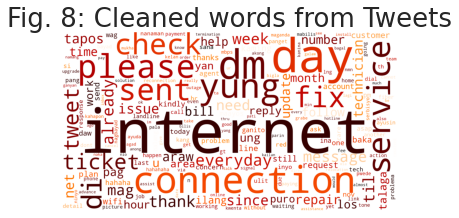

In [14]:
# visualize the cleaned words
regex_tokenizer = RegexpTokenizer(r'[a-z-]+') #\w+
df_tokens = (df_tweets.apply(lambda x: regex_tokenizer.tokenize(x.clean_text), axis=1)
                      .apply(pd.Series).dropna(how='all', axis=1))

arr_tokens = np.concatenate(df_tokens.to_numpy())
cleaned_tokens = [r for r in arr_tokens if r is not np.nan]
plot_wordcloud(cleaned_tokens, 'Cleaned words from Tweets')

### Topic Modeling

Topic modeling is the process of scanning a set of documents, extracting words or phrases patterns within them, and automatically clustering word groups and similar expressions that best characterize a set of documents. The clustering of words is then examined and interpreted as topics that describe the underlying relationships or common themes of these clusters. This is possible with the use of different natural language processing and mathematical techniques. [16]

#### Latent Semantic Analysis (LSA)

LSA is an unsupervised learning technique used in natural language processing to find and examine hidden relationships between terms and concepts using mathematical techniques. It is anchored on the distributional hypothesis that posits that words with similar meanings appear frequently together [17]. After converting text into numerical representation using text vectorization methods such as the TF-IDF, singular value decomposition (SVD) is used to reduce the dimensions of the resulting sparse matrix of term frequencies. From the reduced matrix, singular vectors are derived that contain words and the degree of their affinity to a singular vector. These singular vectors are the latent or hidden factors where we will base our topics for our topic modelling [18].

In [15]:
def svd(X):
    """
    Return the decomposed components Q, Sigma, P^T, and the normalized
    sum of squared differences of X using SVD.

    Parameters
    ----------
    X : numpy array
        Data to be decomposed

    Returns
    -------
    q : numpy array
        Left singular vectors
        
    s: numpy array
        Diagonal matrix of singular values
        
    p: numpy array
        Right singular vectors
        
    nssd: numpy array
        Normalized sum of squared distances from the origin
    """
    q, s, pt = np.linalg.svd(X)
    p = np.linalg.inv(pt)
    nssd = s**2 / np.sum(s**2)
    return q, np.diag(s), p, nssd

def project_svd(q, s, k):
    """
    Return the design matrix of q and s projected on to
    the first k singular vectors

    Parameters
    ----------
    q : numpy array
        Left singular vectors
        
    s: numpy array
        Diagonal matrix of singular values

    Returns
    -------  
    projected_svd
    """
    return q[:, :k] @ s[:k, :k]

def plot_svd(X_new, features, p):
    """
    Plot transformed data and features on to the first two singular vectors
    
    Parameters
    ----------
    X_new : array
        Transformed data
    featurs : sequence of str
        Feature names
    p : array
        P matrix
    """
    fig, ax = plt.subplots(1, 2, gridspec_kw=dict(wspace=0.4), dpi=100)
    ax[0].scatter(X_new[:, 0], X_new[:, 1], alpha=0.7, c='tab:blue')
    ax[0].set_xlabel('SV1')
    ax[0].set_ylabel('SV2')

    for feature, vec in zip(features, p):
        ax[1].arrow(0, 0, vec[0], vec[1], width=0.01, ec='none', fc='r')
        ax[1].text(vec[0], vec[1], feature, ha='center', color='r', fontsize=5)
    ax[1].set_xlim(-1, 1)
    ax[1].set_ylim(-1, 1)
    ax[1].set_xlabel('SV1')
    ax[1].set_ylabel('SV2')
    fig.suptitle(f'Fig. {fig_n}: Transformed data', fontsize=14)
    _ = fig_count()
    plt.show()
    
def plot_featimpt(n_svs, n_words, p, feature_names):
    """
    Plot the importance of each features per singular vector

    Parameters
    ----------
    n_svs : int
        Number of singular vectors
        
    n_words: int
        Number of words (features) to return per singular vector
        
    n_words: int
        Number of words (features) to return per singular vector

    Returns
    -------  
    projected_svd
    """
    for i in range(n_svs):
        fig, ax = plt.subplots(figsize=(4, 6), dpi=100)
        order = np.argsort(np.abs(p[:, i]))[-n_words:]
        ax.barh([feature_names[o] for o in order], p[order, i])
        ax.set_title(f'Fig. {fig_n}: Topic {i+1} (LSA)')
#         fig.savefig(f'lsa_topic{i+1}.png', dpi=150, bbox_inches='tight')
        _ = fig_count()
    plt.show()
    
def plot_sv_var(n_svs, nssd, cumvar_nssd):
    """
    Plot the variance explained of the truncated Singular Value Decomposition

    Parameters
    ----------
    n_svs : int
        Number of singular vectors
        
    nssd: numpy array
        Normalized sum of squared distances of the values from the origin
        
    cumvar_nssd: numpy array
        Cumulative normalized sum of squared distances of the
        values from the origin
    """
    # plot the variance explained
    fig, ax = plt.subplots(figsize=(8, 6), dpi=100)
    ax.plot(range(1, len(nssd)+1), nssd, '-', label='individual')
    ax.set_xlim(-10, len(nssd)+1)
    ax.set_xlabel('Singular Vectors')
    ax.set_ylabel('Variance explained')
    ax = ax.twinx()
    ax.plot(range(1, len(cumvar_nssd)+1), cumvar_nssd, '-',
            label='cumulative', c='tab:blue')
    ax.axhline(0.9, ls='--', color='g')
    ax.axvline(n_svs, ls='--', color='g')
    ax.set_ylabel('Cumulative variance explained')
    plt.title(f'Fig. {fig_n}: {n_svs} Singular Vectors,\n{int(var_threshold*100)}% Explained Variance',
              fontsize=20)
    # plt.savefig('svd_var_explained.png', dpi=150, bbox_inches='tight')
    _ = fig_count()
    plt.show()

#### Non-negative Matrix Factorization (NMF)

NMF is a dimensionality reduction method bespoke to clustering to find themes, topics, or patterns in data. It embeds data into a latent space that makes it more amenable to grouping. NMF is tailored for data matrices that are nonnegative and sparse, and thus very useful in interpreting text data [19]. Compared to SVD, NMF is a better fit to our data as it shows representations in small steps and produces sparse outcomes, making it easier to understand and interpret [20]. 

## IV. Results

### Latent Semantic Analysis

Using Truncated Singular Value Decomposition, the original 493 features were reduced to 272 while retaining 90% of the cumulative variance explained as shown in Figure 9.

N components: 272


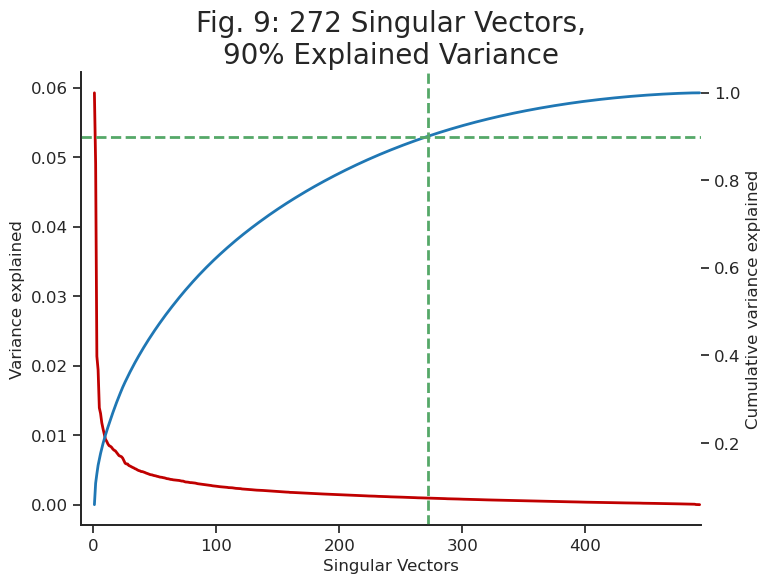

In [16]:
q_svd, s_svd, p_svd, nssd_svd = svd(X)
cumvar_svd = nssd_svd.cumsum()

# determine number of PCs to retain
var_threshold = 0.90
n_svs = 1 + len(cumvar_svd) - len(cumvar_svd[cumvar_svd > var_threshold])
print(f'N components: {n_svs}')
X_new = project_svd(q_svd, s_svd, n_svs)

plot_sv_var(n_svs, nssd_svd, cumvar_svd)

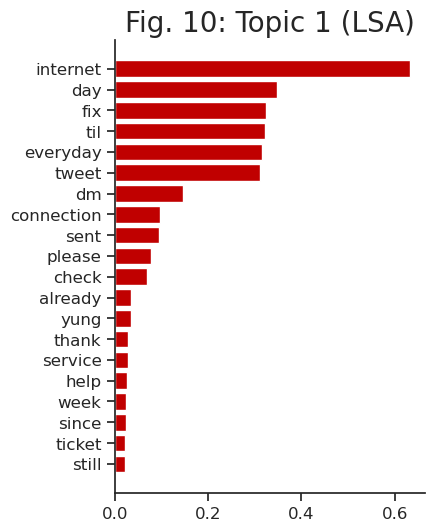

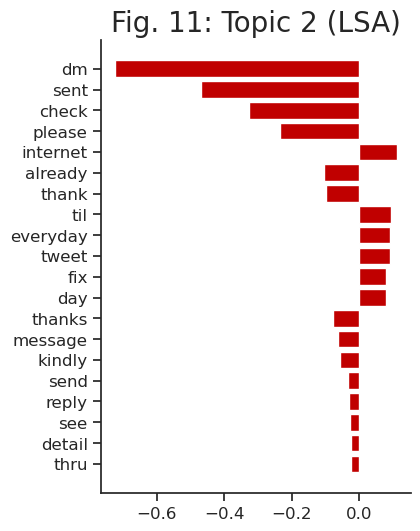

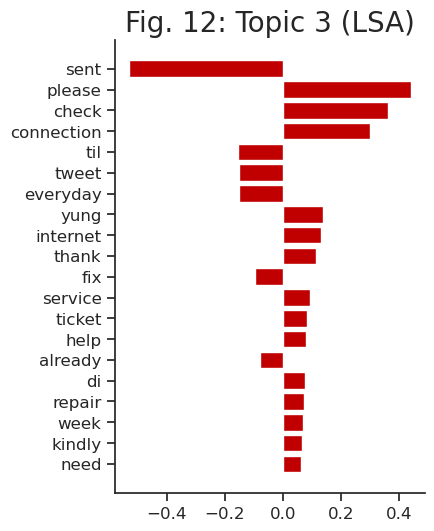

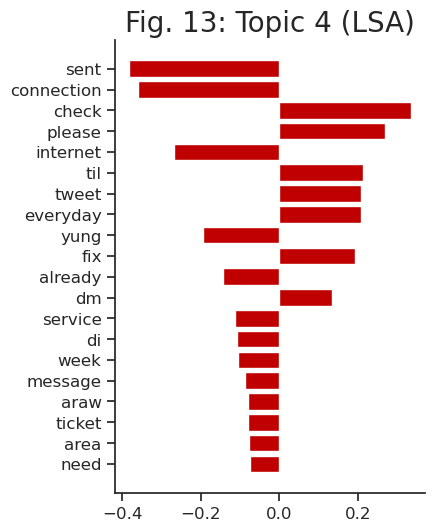

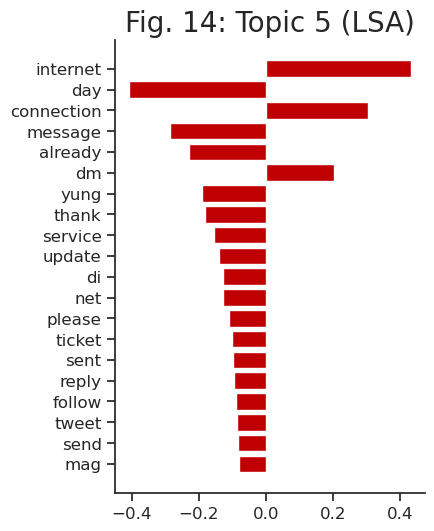

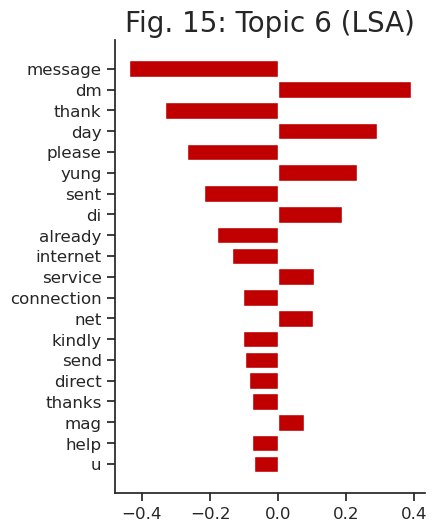

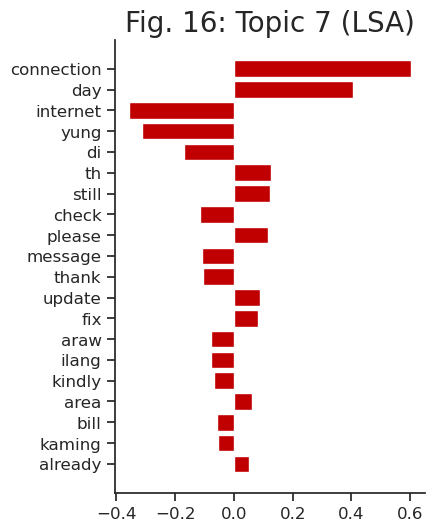

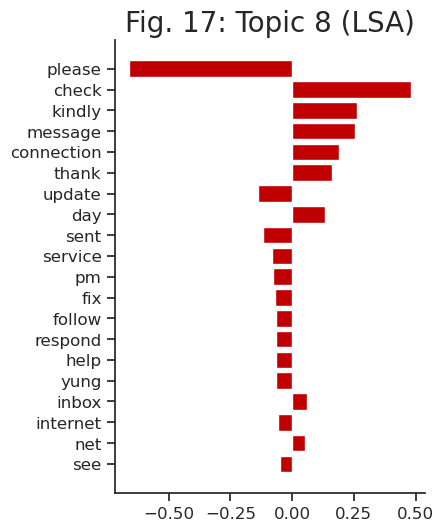

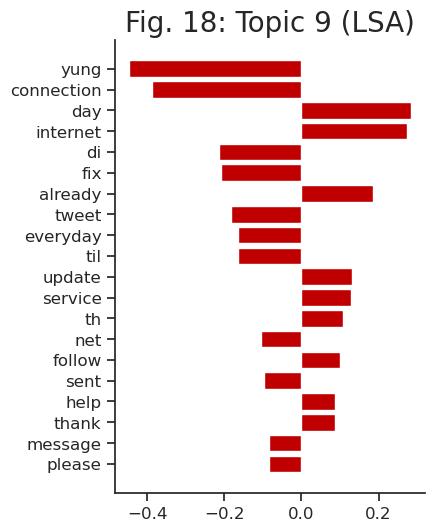

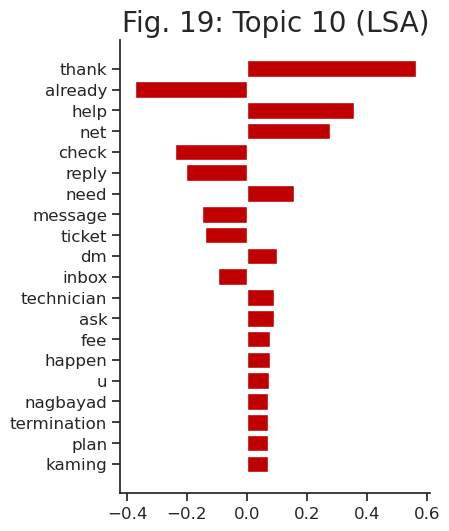

In [17]:
min_svs, n_words = 10, 20
plot_featimpt(min_svs, n_words, p_svd, feature_names)

While most of the singular vectors have either indistinguishable topics, or topics that are similar to other vectors, we've uncovered at least three topics from the top 10 singular vectors inferred from the top 20 words in each:

(1) Topic 1

As shown in Fig. 10, the keywords "already", "week", "follow", "ticket", and "everyday" are indicators of a long waiting time given an initial request for assistance. This concern can be categorized under "Bad Customer Service" with a subcategory of "Long Waiting Time".
    
    
(2) Topic 3

Shown in Fig. 12, the keywords "check", "internet", "connection", "fix", "service", and "repair" relays the concern of customers regarding interrupted Internet connection and a request for action from PLDT. This concern can be categorized under "Bad Service" with a subcategory of "Disconnection".
    
(3) Topic 10

Fig. 19 shows the presence of keywords "help", "need", "technician", "fee", "nagbayad", and "plan" which are indicators of the lack of resolution upon the first customer-CS agent interaction, or billing concerns. Thus, this can be categorized under "Bad Customer Service" with subcategories "No First Action Resolution" and "Billing Concern".


In summary, below are the 3 topics uncovered using LSA:

<center>Figure 20: Summary of Results: LSA </center>
<img src='images/img_results_lsa.png' width='700' height='400'>

In [18]:
_ = fig_count() # to update global variable of figure count

### Non-negative Matrix Factorization (NMF)

To get the optimal number of latent factors needed to reconstruct the original data with relevant information despite reduced dimensions, we do a grid search and fit 1 to 50 latent factors on the NMF model and get the number at which the reconstruction error is minimized. Through this, the original 493 features were reduced to 49 Latent factors as shown in Figure 21.

Note that grid search was only done for up to 50 latent factors due to increased run time and complexity if we further increase this number.

  0%|          | 0/25 [00:00<?, ?it/s]

Important Latent Factors: 49


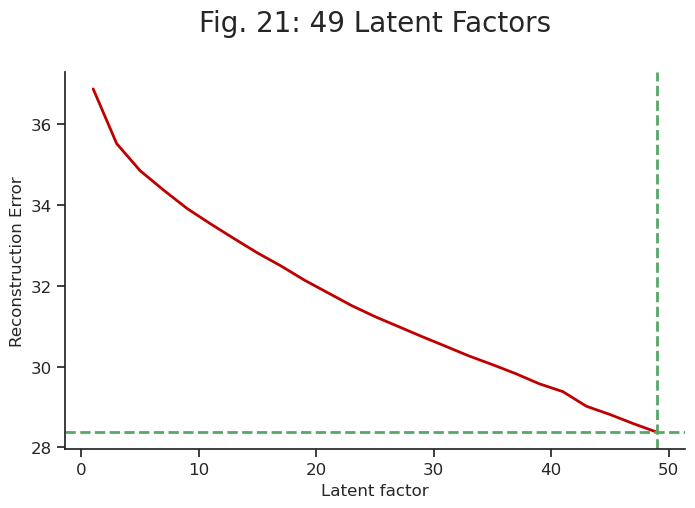

In [19]:
# determine the optimal latent factor needed for NMF
model_err = []
min_, max_ = 1, 50 # to reduce run time and complexity, this was gradually increased
test = list(range(min_, max_, 2))

for n in trange(min_, max_, 2):
    nmf = NMF(n_components=n, random_state=randstate)
    U = nmf.fit_transform(X)
    V = nmf.components_.T
    model_err.append(nmf.reconstruction_err_)
    
min_lfs = test[np.argmin(model_err)]
print(f'Important Latent Factors: {min_lfs}')
cumerr = np.cumsum(model_err)

# plot the reconstruction error across different latent factors
plt.figure(figsize=(8, 5), dpi=100)
plt.plot(test, model_err)
plt.axhline(model_err[np.argmin(model_err)], ls='--', color='g')
plt.axvline(min_lfs, ls='--', color='g')
plt.title(f'Fig. {fig_n}: {min_lfs} Latent Factors\n', fontsize=20)
plt.ylabel('Reconstruction Error')
plt.xlabel('Latent factor')
# plt.savefig('nmf_model_err.png', dpi=150, bbox_inches='tight')
plt.show()

_ = fig_count()

An NMF model was then trained with the optimal number of latent factors determined from doing grid search.
This model was then used to get the relevant words from the texts and uncover the hidden topics.

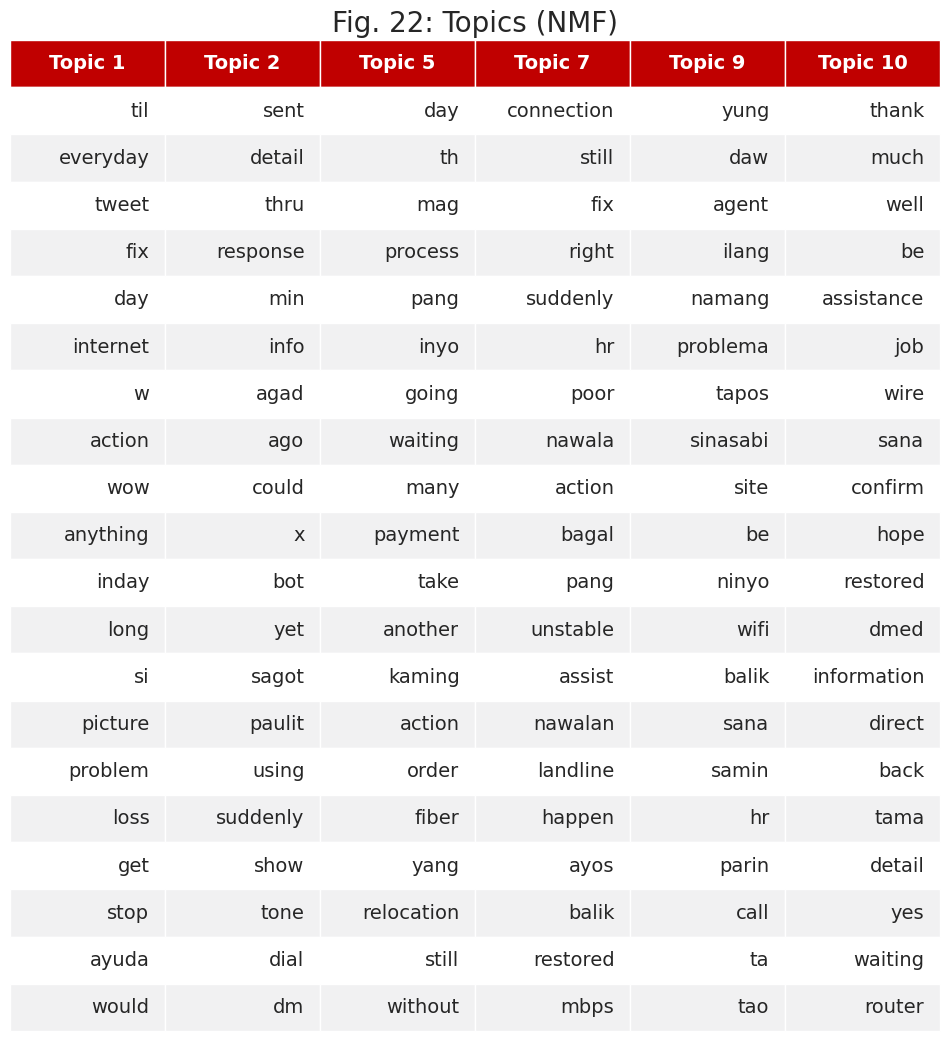

In [20]:
n_topics, n_words = 10, 20

# fit the NMF model with the optimal latent factors identified
nmf = NMF(n_components=min_lfs, random_state=randstate)
U = nmf.fit_transform(X)
V = nmf.components_.T

# get the top 20 words in each of the top 10 latent factors
word_dict = {};
for i in range(n_topics):
    # for each topic, sort the words by descending weights
    words_ids = np.argsort(np.abs(nmf.components_[i]))[:-n_words - 1:-1]
    words = [feature_names[key] for key in words_ids]
    word_dict[f'Topic {i+1}'] = words
    
df_nmf = pd.DataFrame(word_dict)
# df_nmf

topics = ['Topic 1', 'Topic 2', 'Topic 5', 'Topic 7', 'Topic 9', 'Topic 10']
fig, ax = render_mpl_table(df_nmf[topics], header_columns=0, col_width=2.0)

Figure 22 shows the top 20 keywords in each of the 6 topics we've uncovered using NMF:

(1) Topic 1

Words such as "everyday", "fix", "long", "problem", "asap", and "resolution" may suggest a follow up on the lack of resolution on concerns raised previously. This could be categorized under "Bad Customer Service" with subcategory "Follow ups".
    
(2) Topic 2

"paulit", "bot", "yet", "problem", and "detail" hints on customers' aversion towards automated responses (e.g., chat bots as inferred from @PLDT_Cares' replies to customers' tweets) due to its repetitiveness and inability to discern details of the problem. This can be categorized under "Bad Customer Service" with subcategory "Automated Responses".

(3) Topic 5

"process", "action", "payment", "order", and "relocation" suggests customers' request or inquiry on line relocation and billing concern. Line relocation is needed when a customers' phone and Internet systems are transferred from one location to another but is still under the same account. These concerns can be categorized under "Relocation Inquiry" and "Billing Concern".

(4) Topic 7

Similar to LSA, we've also seen a topic regarding disconnection through the words "connection", "poor", "bagal", "suddenly", "fix", "nawala", and "unstable". With that, this will be tagged under the same category as before - "Bad Service: Disconnection".

(5) Topic 9

Words such as "agent", "site", "hr", "problema", and "sinasabi" seems to hint on customers' frustration on the lack of resolution after its first interaction with a Customer Service agent. An example of what causes this is the disconnect between the CS agent's instructions vs. the onsite technician's diagnosis of the problem. This concern can be categorized under "Bad Customer Service" with subcategory "No First Action Resolution".


(6) Topic 10

"thank", "much", "assistance", "restored", and "well" hints on a customers' feedback on the service it received. On the surface, the words seem to be positive, but further analysis on its sentiment should be done to formally score the postivity or negativity of the text.


In summary, below are the 6 topics and their subtopics uncovered using NMF:

<center>Figure 23: Summary of Results: NMF </center>

<img src='images/img_results_nmf1.png' width='700' height='400'>

<img src='images/img_results_nmf2.png' width='700' height='400'>

### LSA-NMF Results vs. Actual Categories used in PLDT

Upon consulting with a domain expert, the consolidated results of our topic models (LSA & NMF) was able to cover 5 out of the 10 categories PLDT currently uses to segregated customer concerns. This shows the potential of topic modeling to further enrich the current generalized categories in PLDT and improve the efficiency of directing these concerns to the right solutions expert, which in return, speeds up the resolution time. A more specified topic of concern instead of a general one can also help improve customer interactions especially for people who dislike automated generic responses that lack discernment on the specific concern that is being raised.

PLDT is already capable of categorizing customer concerns coming in from their formal channels such as calls through landline or chats through Facebook Messenger. However, these are either structured responses fed into the database, or manually tagged by Customer Service agents if unstructured. PLDT has yet to utilize topic modeling techniques to streamline the process of categorizing customer concerns coming in from (informal) online channels such as Twitter whose data is unstructured. This opens up a lot of opportunities especially when there is a portion of their customers who has more access to the Internet than landline as seen by how they air out their concerns on social media instead of calling PLDT despite connectivity issues.

<center>Figure 24: Mapping of Results to Actual Categories used in PLDT to Segregate Customer Concerns </center>
<img src='images/img_results_actual.png' width='700' height='400'>

## V. Conclusion

PLDT customers have become more comfortable with voicing out their grievances about PLDT services online. While official channels such as phone consultations and websites are always available, customers found that it is quicker and easier to complain on Twitter due to their immediate access to the internet and social media. From a study conducted by Customer Care Measurement & Consulting in 2021, the number of customers that preferred airing out grievances in digital space tripled from 2017 to 2020 [21]. Specifically, for PLDT customers, the publish time of the tweets revealed that most of them published tweets from midnight until 4:00 am. It is important to note that PLDT often conducts its maintenance during this time, to prevent disrupting critical business processes for its subscribers during the day. Although our results revealed that the tweets have common themes and can be grouped into distinct, exhaustive topics, the Twitter users were mostly only concerned about their own connectivity issues and no collective sentiment as observed in the lack of viral tweets in the timeframe.

Compared to LSA, NMF was able to uncover more relevant topics. In an article by Albanese (2022), he compared multiple topic modeling techniques and mentioned that multiple studies argued the superior results of NMF over LSA in terms of interpretability and clarity of the identified topics [22]. In fact, in this study, most topics generated from LSA were similar to each other and were unable to distinguish customer concerns. Topics generated from NMF were able to identify and distinguish customer concerns: No First Action Response, Long Waiting Time, Automated Responses, Disconnection, Line Relocation Inquiry, Billing Concerns, and Feedback. These topics were verified to coincide with some of the actual categories PLDT uses to segregate customer concerns. Together with LSA, the topics would cover half of the categories used by PLDT. Lastly, although NMF has better results, it should be noted that there would be different approximations of the matrices in NMF for every run of the algorithm. To have reproducible matrices and results, the random state should always be specified.


## VI. Limitations & Recommendations

NMF can be used to infer the type of customer concern from tweets, to designate it correctly to the appropriate department, and to immediately resolve the issue. While PLDT has existing typologies for its customers, namely Sales, After Sales, and Follow Up, the topics the study uncovered could enrich and dissect these further. Especially for Follow Up, tweets showed that there are specific concerns about this area of the company’s customer service that people were unsatisfied with. For example, customers expressed aversion and distrust towards generic and automated tweet responses to their follow-ups. Another example was customers’ dissatisfaction with the company’s no first action response to their follow-ups where requests for repairs or troubleshooting were not rendered despite receiving a ticket. Knowing exactly what customers demand allows the company to strategically segment their interventions and properly allocate human and technological resources to resolve issues.

Although unique customer concerns were identified in this project, sentiment and contextual analysis of the tweets were not investigated. This kind of analysis would prove useful especially for confirming the meaning of words that can be used in several contexts. For example, in the uncovered topic for Feedback, we observed the words “thank” and “much”. We provided an initial interpretation that these words meant gratefulness or gratitude. However, both words could have been tweeted in the context of sarcasm where a person would write “thank you very much” in anticipation of incompetent customer service. Neglecting context could misrepresent people’s grievances that could compromise the effectiveness of the company’s initiatives to address customer concerns.
 
Other clustering methods should also be investigated and whether more patterns would appear as more data is collected in longer periods. One clustering method that can be implemented that can verify or enrich our results from NMF is affinity propagation. The method excels when we are unsure of the number of clusters or topics that would result from tweet data, especially when more than seven days' worth of tweets are mined and analyzed.


## VII. References

[1] Nielsen, J. (2019). Neilsen’s Law of Internet Bandwidth. https://www.nngroup.com/articles/law-of-bandwidth/ 

 

[2] Deloitte. The economic impact of disruptions to Internet connectivity. https://www.deloitte.com/global/en/Industries/tmt/perspectives/the-economic-impact-of-disruptions-to-internet-connectivity-report-for-facebook.html 

 

[3] Airtel Business. (2022). Importance of Uninterrupted Internet Connection for Your Business. https://www.airtel.in/blog/business/importance-of-uninterrupted-internet-connection-for-your-business/ 

 
[4] Twitter Developer Platform. https://developer.twitter.com/en 


[5] PLDT Inc.’s SEC Form 17-A Annual Report and Audited Financial Statements as of December 31, 2021 


[6] PLDT is PH’s fastest internet provider in 2021 - Ookla. https://pldthome.com/news-media/2022/02/28/pldt-is-ph-s-fastest-internet-provider-in-2021-ookla 

[7] James. Topic Modelling in Python. https://ourcodingclub.github.io/tutorials/topic-modelling-python/

[8] NLTK Package. https://www.nltk.org/

[9] Pagaduan, Z. (2021). https://www.kaggle.com/code/zaldyjr/pldt-public-tweets-visualization 

 
[10] GeeksforGeeks (2022). Python – Lemmatization Approaches with Examples. https://www.geeksforgeeks.org/python-lemmatization-approaches-with-examples/ 


[11] Srunidhi, S. (2020). Lemmatization in Natural Language Processing (NLP) and Machine Learning https://towardsdatascience.com/lemmatization-in-natural-language-processing-nlp-and-machine-learning-a4416f69a7b6 

 

[12] Zhou, V. (2019). A Simple Explanation of the Bag-of-Words Model https://victorzhou.com/blog/bag-of-words/ 

 

[13] Great Learning Team (2022). An Introduction to Bag of Words (BoW) | What is Bag of Words? https://www.mygreatlearning.com/blog/bag-of-words/ 

 


[14] GeekforGeeks (2022). Understanding TF-IDF (Term Frequency-Inverse Document Frequency) https://www.geeksforgeeks.org/understanding-tf-idf-term-frequency-inverse-document-frequency/ 

 

[15] Góralewicz, B. (2018). The TF\*IDF Algorithm Explained https://www.onely.com/blog/what-is-tf-idf/ 
 
 
[16] Blei, David (April 2012). Probabilistic Topic Models. Communications of the ACM. 55 (4): 77–84. doi:10.1145/2133806.2133826. S2CID 753304. 

[17] Susan T. Dumais (2005). Latent Semantic Analysis. Annual Review of Information Science and Technology. 38: 188–230. 


[18] Ioana (2020). Latent Semantic Analysis: intuition, math, implementation. https://towardsdatascience.com/latent-semantic-analysis-intuition-math-implementation-a194aff870f8 

[19] Eunus, S. I. (2021) What is  Non-Negative Matrix Factorization (NMF)? https://medium.com/codex/what-is-non-negative-matrix-factorization-nmf-32663fb4d65 

 

[20] Aggarwal, C. C. (2015). Data Mining. Springer. 


[21] Customer Care Measurement & Consulting. (2020). 2020 National Customer Rage Study.   https://www.customercaremc.com/insights/national-customer-rage-study/2020-national-customer-rage-study/ 

 
[22] Albanese, N.C. (2022). Topic Modeling with LSA, pLSA, LDA, NMF, BERTopic, Top2Vec: a Comparison. https://towardsdatascience.com/topic-modeling-with-lsa-plsa-lda-nmf-bertopic-top2vec-a-comparison-5e6ce4b1e4a5#78f7 